# Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='dark')
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

# Loading the dataset

In [4]:
# Loading the dataset
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

# Printing the shape of the arrays
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


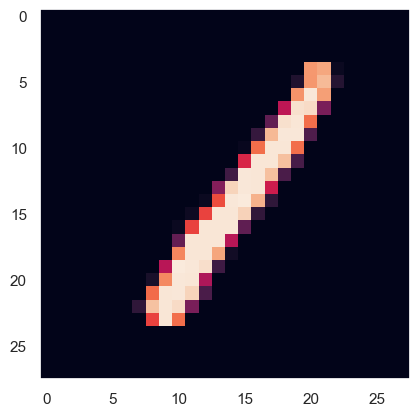

In [5]:
# Displaying image
plt.imshow(X_train[5351])

# Normalization

In [4]:
# Normalizing the data and changing dtype to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Building the CNN model

In [5]:
# Adding layers to the model
cnn = keras.Sequential([
keras.layers.InputLayer(input_shape=(28, 28)),
keras.layers.Conv1D(28, kernel_size=2, activation='relu'),
keras.layers.MaxPool1D(),
keras.layers.Flatten(),
keras.layers.Dense(300, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
# Compiling the CNN model
cnn.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model with 15 epochs
cnn.fit(X_train, Y_train, epochs=15)

Train on 60000 samples
Epoch 1/15000000000000000000
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0694 - acc: 0.9795
Epoch 2/15000000000000000000
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0664 - acc: 0.9803
Epoch 3/15000000000000000000
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0636 - acc: 0.9809
Epoch 4/15000000000000000000
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0611 - acc: 0.9814
Epoch 5/15000000000000000000
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0584 - acc: 0.9827
Epoch 6/15000000000000000000
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0562 - acc: 0.9828
Epoch 7/15000000000000000000
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0548 - acc: 0.9836
Epoch 8/15000000000000000000
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0523 - acc: 0.9846
Epoch 9/150000000

# Predicting the output

In [7]:
Y_prob = cnn.predict(X_test)
Y_pred = Y_prob.argmax(axis=1)
print(Y_pred)
print(Y_test)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


# Comparing the actual and predicted

In [8]:
actual_pred = pd.DataFrame()
actual_pred['Actual'] = Y_test
actual_pred['Predicted'] = Y_pred
actual_pred.head(10)

,Actual,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [9]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

